# **Data Diri**

---
Nama : Ananda Rizky Nurhidayat

Alamat : Kabupaten Bekasi, Cikarang Selatan

Email : anandakiki1984@gmail.com

SIB Email : M314X0817@dicoding.org

SIB ID : M314X0817

# Introduction

Proyek ini merupakan proyek terakhir dari Dicoding pada kelas Machine Learning Terapan. Pada proyek ini kita akan membuat sebuah **Sistem Rekomendasi** untuk memenuhi submission yang telah diberikan.

# Data Understanding

Kaggle API Setup

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Upload API token yang berformat .json

> API token ini bisa kita dapatkan dari web kaggle yang sudah kalian loginkan. Ketika anda sudah login, lalu kalian pergi ke bagian akun anda, anda scroll kebawah dan nanti anda akan menemukan Create New API Token pada bagian API

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anndxrzky","key":"055328affd77b3bc7317c56d11341fa8"}'}

Memindahkan file kaggle.json kedalam config folder

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# gunakan ls untuk melihat apakah sudah masuk kedalam folder atau belum
!ls ~/.kaggle

kaggle.json


Mempersiapkan dataset dengan mengunduhnya melalui website kaggle

In [ ]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

 71% 17.0M/23.8M [00:00<00:00, 27.0MB/s]
100% 23.8M/23.8M [00:00<00:00, 32.4MB/s]


Melakukan pengekstrakan terhadap dataset dengan menggunakan perintah unzip

In [ ]:
!unzip book-recommendation-dataset.zip

Archive:  book-recommendation-dataset.zip
  inflating: Books.csv               
  inflating: Ratings.csv             
  inflating: Users.csv               


Terdapat 3 file csv didalamnya, yaitu Books.csv, Ratings.csv, dan Users.csv

Selanjutnya, mari kita baca data-data di atas dengan menggunakan fungsi pandas.read_csv sebagai berikut.

In [ ]:
import pandas as pd

books = pd.read_csv('/content/Books.csv')
ratings = pd.read_csv('/content/Ratings.csv')
users = pd.read_csv('/content/Users.csv')

print('Jumlah data penilaian user: ', len(ratings['User-ID'].unique()))
print('Jumlah data user: ', len(users['User-ID'].unique()))

Jumlah data penilaian user:  105283
Jumlah data user:  278858


Dapat kita lihat bahwa data User-ID yang berada pada dataset Ratings berjumlah 105283 dan jumlah data User dari dataset Users itu sendiri adalah 278858. Ini merupakan data yang sangat banyak dan kita dapat memberikan rekomendasi yang sangat baik pula.

# Univariate Exploratory Data Analysis

Variabel-variabel pada Books Recommendation Dataset adalah sebagai berikut:

- books : merupakan informasi mengenai data buku tersebut.
- ratings : merupakan penilaian terkait buku yang dibaca.
- users : merupakan data pengguna.

Variabel books dan ratings akan digunakan pada model rekomendasi kita. Sedangkan, variabel users hanya untuk melihat data dari si pengguna.

### Books Variabel

Melihat isi dari variabel books

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Kemudian kita explorasi variabel books dengan mengimplementasikan kode berikut.

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Berdasarkan output di atas, kita dapat mengetahui bahwa file *Books.csv* memiliki **271360 entri**. Dikarenakan memiliki sekali banyak data dalam variabel books ini, maka saya akan memangkas atau mengambil beberapa bagian saja sekitar **4500 entri** dari variabel ini untuk kita gunakan dalam proses sistem rekomendasi ini.

In [ ]:
books = books[1:4501]
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 1 to 4500
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 4500 non-null   object
 1   Book-Title           4500 non-null   object
 2   Book-Author          4500 non-null   object
 3   Year-Of-Publication  4500 non-null   object
 4   Publisher            4500 non-null   object
 5   Image-URL-S          4500 non-null   object
 6   Image-URL-M          4500 non-null   object
 7   Image-URL-L          4500 non-null   object
dtypes: object(8)
memory usage: 281.4+ KB


Terlihat disini sudah menjadi **4500 entri**. Selanjutnya, kita akan melihat ada berapa banyak judul buku yang unik serta menampilkan judul apa saja yang terdapat dalam buku tersebut.

In [ ]:
print('Jumlah Judul Buku: ', len(books['Book-Title'].unique()))
print('Judul Buku: ', books['Book-Title'].unique())

Jumlah Judul Buku:  4355
Judul Buku:  ['Clara Callan' 'Decision in Normandy'
 'Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It'
 ... 'The Remarkable Journey of Prince Jen' 'The Fresco' 'The Family Tree']


Terdapat 4355 data buku yang unik dengan judul buku berbeda-beda seperti yang terlihat pada output kode.

### Ratings Variabel

Melihat isi dari variabel ratings

In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Kemudian kita explorasi variabel ratings dengan mengimplementasikan kode berikut.

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Berdasarkan output di atas, kita dapat mengetahui bahwa file *Ratings.csv* memiliki **1149780 entri**. Kita akan lakukan hal sama seperti variabel books sebelumnya, yaitu dengan mengambil 4500 jumlah entri saja untuk kita gunakan dalam proses sistem rekomendasi ini.

In [ ]:
ratings = ratings[1:4501]
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 1 to 4500
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User-ID      4500 non-null   int64 
 1   ISBN         4500 non-null   object
 2   Book-Rating  4500 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 105.6+ KB


Terlihat disini sudah menjadi **4500 entri**. Selanjutnya kita akan melihat distribusi ratings pada data.

In [ ]:
ratings.describe()

,User-ID,Book-Rating
count,4500.000000,4500.000000
mean,277588.145111,3.196222
std,481.093474,3.910187
min,276726.000000,0.000000
25%,277195.000000,0.000000
50%,277517.500000,0.000000
75%,278022.250000,7.000000
max,278418.000000,10.000000


Dari output di atas, diketahui bahwa nilai **maksimum rating** adalah **10** dan **nilai minimumnya** adalah **0**. Artinya, skala rating berkisar antara **0** hingga **10**.

Dan kita akan lihat berapa pengguna yang memberikan rating, jumlah ISBN, dan jumlah rating

In [ ]:
print('Jumlah ID user: ', len(ratings['User-ID'].unique()))
print('Jumlah ISBN: ', len(ratings['ISBN'].unique()))
print('Jumlah data penilaian buku: ', len(ratings['Book-Rating']))

Jumlah ID user:  678
Jumlah ISBN:  4197
Jumlah data penilaian buku:  4500


Terdapat 678 jumlah ID user, 4197 jumlah ISBN, dan 4500 jumlah data dari penilaian buku tersebut.

### Users Variabel

kita explorasi variabel users dengan mengimplementasikan kode berikut.

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Berdasarkan output di atas, kita dapat mengetahui bahwa file *Users.csv* memiliki **278858 entri**. Kita akan lakukan hal sama seperti variabel books dan ratings sebelumnya, yaitu dengan mengambil 4500 jumlah entri saja untuk kita gunakan dalam proses sistem rekomendasi ini.

In [ ]:
users = users[1:4501]
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 1 to 4500
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User-ID   4500 non-null   int64  
 1   Location  4500 non-null   object 
 2   Age       2776 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.6+ KB


Terlihat disini sudah menjadi **4500 entri**. Selanjutnya kita akan melihat berapa jumlah kolom dan baris pada variabel users.

In [ ]:
print(users.shape)

(4500, 3)


Selanjutnya, mari kita lihat isi dari variabel users.

In [ ]:
users.head()

,User-ID,Location,Age
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0


# Data Preprocessing

### Books Variabel

dikarenakan terdapat 3 fitur yang tidak kita gunakan dalam variabel books, maka disini kita akan melakukan drop kolom terhadap ketiganya

In [ ]:
books = books.drop(columns=['Image-URL-L', 'Image-URL-M', 'Image-URL-S'],axis=1)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group


### Ratings Variabel

> Check Missing Value

In [ ]:
# Check missing value dengan fungsi isnull()
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

> Mengetahui jumlah rating

In [ ]:
# Menghitung jumlah rating, kemudian menggabungkannya berdasarkan ISBN
ratings.groupby('ISBN').sum()

,User-ID,Book-Rating
ISBN,,
0002231115,277962,0
0002232766,277962,0
0002240114,277996,6
000225669X,276912,6
000254794,277399,9
...,...,...
9995585227,277478,0
B0000BLD7X,276762,0
B158991965,276884,6


### Menggabungkan data dengan fitur penilaian buku

Pertama, definisikan variabel all_books_rate dengan variabel ratings yang telah kita ketahui sebelumnya.

In [ ]:
all_books_rate = ratings
all_books_rate

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
...,...,...,...
4496,278418,0140177396,0
4497,278418,0140184953,0
4498,278418,0140244824,0
4499,278418,014025448X,0


Kemudian kita gabungkan data books yang berisikan ISBN, Book-Title, dan Book-Author berdasarkan ISBN dan memasukkannya ke dalam variabel all_books_name

In [ ]:
# Menggabungkan all_books_rate dengan dataframe books berdasarkan ISBN, Book-Title, dan Book-Author
all_books = pd.merge(all_books_rate, books[['ISBN','Book-Title','Book-Author']], on='ISBN', how='left')
all_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
0,276726,0155061224,5,NaN,NaN
1,276727,0446520802,0,NaN,NaN
2,276729,052165615X,3,NaN,NaN
3,276729,0521795028,6,NaN,NaN
4,276733,2080674722,0,NaN,NaN
...,...,...,...,...,...
4495,278418,0140177396,0,NaN,NaN
4496,278418,0140184953,0,NaN,NaN
4497,278418,0140244824,0,Songs in Ordinary Time (Oprah's Book Club (Pap...,Mary McGarry Morris
4498,278418,014025448X,0,At Home in Mitford (The Mitford Years),Jan Karon


### Users Variabel

Disini kita akan menggabungkan seluruh data User-ID yang terdapat pada variabel users dan ratings

In [ ]:
import numpy as np

# Menggabungkan seluruh User-ID
user_all = np.concatenate((
    users['User-ID'].unique(),
    ratings['User-ID'].unique()
))

# Mengurutkan data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all))

print('Jumlah seluruh data user: ', len(user_all))

Jumlah seluruh data user:  5178


# Data Preparation

### Mengatasi Missing Value

Setelah proses penggabungan, mari kita cek lagi datanya apakah ada missing value atau tidak.

In [ ]:
all_books.isnull().sum()

User-ID           0
ISBN              0
Book-Rating       0
Book-Title     3837
Book-Author    3837
dtype: int64

Dapat kita lihat disini, ternyata terdapat 3837 missing value pada fitur Book-Title dan Book-Author. Oleh karena itu kita akan drop missing value yang terdapat pada Book-Title dan Book-Author tersebut.

In [ ]:
all_books_clean = all_books.dropna()
all_books_clean

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
9,276746,0425115801,0,Lightning,Dean R. Koontz
10,276746,0449006522,0,Manhattan Hunt Club,JOHN SAUL
11,276746,0553561618,0,Dark Paradise,TAMI HOAG
12,276746,055356451X,0,Night Sins,TAMI HOAG
18,276747,0671537458,9,Waiting to Exhale,Terry McMillan
...,...,...,...,...,...
4454,278418,0064407055,0,Ella Enchanted (Trophy Newbery),Gail Carson Levine
4467,278418,0066211611,0,Portrait in Sepia,Isabel Allende
4488,278418,0140065172,0,Ordinary People,Judith Guest
4497,278418,0140244824,0,Songs in Ordinary Time (Oprah's Book Club (Pap...,Mary McGarry Morris


Perhatikanlah, data kita sekarang memiliki 663 baris. Lalu kita cek kembali untuk memastikan bahwa sudah tidak memiliki missing value lagi dalam data.

In [ ]:
# Mengecek kembali missing value pada variabel all_books_clean
all_books_clean.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
Book-Title     0
Book-Author    0
dtype: int64

In [ ]:
len(all_books)

4500

Selanjutnya kita akan masuk ke tahap persiapan. Kita akan mengurutkan buku berdasarkan nomor ISBN dan memasukkannya ke dalam variabel preparation.

In [ ]:
# Mengurutkan buku berdasarkan ISBN kemudian memasukkannya ke dalam variabel preparation
preparation = all_books_clean.sort_values('ISBN', ascending=True)
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
4337,278418,0020442408,0,Prince Caspian,C. S. Lewis
4339,278418,0020532105,0,CRY THE BELOVED COUNTRY (Scribner Classic),Alan Paton
3988,278194,0020532105,10,CRY THE BELOVED COUNTRY (Scribner Classic),Alan Paton
412,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
2386,277623,002542730X,5,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
...,...,...,...,...,...
767,276994,3596214629,8,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding
482,276925,8423970647,0,No Pasaran! El Videojuego,Chrstine Lehmann
485,276925,8427007450,0,Desaparecido: LA Autentica Historia De LA Ejec...,Thomas Hauser
347,276875,8806155873,0,Un Giorno Dopo L'altro,Carlo Lucarelli


Selanjutnya, kita akan membuang data duplikat pada kolom ISBN.

In [ ]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('ISBN')
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
4337,278418,0020442408,0,Prince Caspian,C. S. Lewis
4339,278418,0020532105,0,CRY THE BELOVED COUNTRY (Scribner Classic),Alan Paton
412,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
1458,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau
1459,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens
...,...,...,...,...,...
767,276994,3596214629,8,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding
482,276925,8423970647,0,No Pasaran! El Videojuego,Chrstine Lehmann
485,276925,8427007450,0,Desaparecido: LA Autentica Historia De LA Ejec...,Thomas Hauser
347,276875,8806155873,0,Un Giorno Dopo L'altro,Carlo Lucarelli


Selanjutnya, kita perlu melakukan konversi data series menjadi list. Dalam hal ini, kita menggunakan fungsi tolist() dari library **numpy**.

In [ ]:
# Mengonversi data series 'ISBN' menjadi dalam bentuk list
book_id = preparation['ISBN'].tolist()

# Mengonversi data series 'Book-Title' menjadi dalam bentuk list
book_title = preparation['Book-Title'].tolist()

# Mengonversi data series 'Book-Author' menjadi dalam bentuk list
book_author = preparation['Book-Author'].tolist()

print(len(book_id))
print(len(book_title))
print(len(book_author))

493
493
493


Tahap berikutnya, kita akan membuat dictionary untuk menentukan pasangan key-value pada data book_id, book_title, dan book_author yang telah kita siapkan sebelumnya.

In [ ]:
book_new = pd.DataFrame({
    'book_id': book_id,
    'book_title': book_title,
    'book_author': book_author
})
book_new

,book_id,book_title,book_author
0,0020442408,Prince Caspian,C. S. Lewis
1,0020532105,CRY THE BELOVED COUNTRY (Scribner Classic),Alan Paton
2,002542730X,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
3,0030615321,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau
4,0060002050,On a Wicked Dawn (Cynster Novels),Stephanie Laurens
...,...,...,...
488,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding
489,8423970647,No Pasaran! El Videojuego,Chrstine Lehmann
490,8427007450,Desaparecido: LA Autentica Historia De LA Ejec...,Thomas Hauser
491,8806155873,Un Giorno Dopo L'altro,Carlo Lucarelli


# Model Development dengan Content Based Filtering

### TF-IDF Vectorizer

Pada tahap ini, kita akan membangun sistem rekomendasi menggunakan teknik TF-IDF Vectorizer yang dimana teknik tersebut digunakan untuk menemukan representasi fitur penting dari setiap kategori buku. untuk menggunakannya kita gunakan fungsi tfidfvectorizer() dari library sklearn.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data 'book_title'
tf.fit(book_new['book_title']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '01',
 '12',
 '14',
 '1984',
 '1st',
 '24',
 '2nd',
 '40',
 '45',
 '451',
 '50',
 '987',
 'abel',
 'about',
 'abrahams',
 'absence',
 'accents',
 'according',
 'account',
 'acres',
 'address',
 'adolescent',
 'adventures',
 'again',
 'against',
 'agency',
 'ages',
 'agreements',
 'air',
 'airframe',
 'alex',
 'algernon',
 'alias',
 'alice',
 'alienist',
 'all',
 'along',
 'altars',
 'altro',
 'amazing',
 'amazonia',
 'ambitions',
 'american',
 'amp',
 'an',
 'anatomist',
 'ancient',
 'and',
 'andromeda',
 'angela',
 'angels',
 'animorphs',
 'animus',
 'anna',
 'anne',
 'anniversary',
 'apprentice',
 'archaeological',
 'are',
 'armageddon',
 'around',
 'arranged',
 'artemis',
 'artemisia',
 'as',
 'ashes',
 'ashley',
 'ask',
 'at',
 'autentica',
 'author',
 'authoritative',
 'autobiography',
 'autumn',
 'awake',
 'away',
 'babel',
 'baby',
 'back',
 'backlist',
 'bad',
 'badger',
 'bag',
 'bah',
 'ballad',
 'ballantine',
 'balzac',
 'bantam',
 'barry',
 'basement',
 'bastard',
 

Selanjutnya, lakukan fit dan transformasi ke dalam bentuk matriks. 

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(book_new['book_title']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(493, 1081)

Perhatikanlah, matriks yang kita miliki berukuran **(493, 1081)**. Nilai **493** merupakan **ukuran data** dan **1081** merupakan matrik **kategori buku**. 

Untuk menghasilkan **vektor tf-idf** dalam bentuk matriks, kita menggunakan fungsi todense() sebagai berikut.

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Selanjutnya, mari kita lihat matriks **tf-idf** untuk beberapa **kategori buku**.

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan judul buku
# Baris diisi dengan author buku
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=book_new.book_author
).sample(1081, axis=1).sample(10, axis=0)

,freedom,ophelia,bean,meany,leaf,parfum,rose,out,portrait,sun,...,hereafter,kate,angels,high,seeing,pitt,vampires,through,tom,everest
book_author,,,,,,,,,,,,,,,,,,,,,
Sue Grafton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
Nevada Barr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
ANNE TYLER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
Patricia Daniels Cornwell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
Mary Higgins Clark,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
James Patterson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
Barbara Delinsky,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
J. K. Rowling,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.52619,0.0,0.0
Robert B. Parker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


### Cosine Similarity

Sekarang, kita akan menghitung derajat kesamaan (similarity degree) antar buku dengan teknik cosine similarity. Di sini, kita menggunakan fungsi cosine_similarity dari library sklearn.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.23278412],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.23278412, 0.        ,
        1.        ]])

Selanjutnya, mari kita lihat matriks kesamaan setiap book author dengan menampilkan book author dalam 7 sampel kolom (axis = 1) dan 10 sampel baris (axis=0). Jalankan kode berikut.

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa author buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=book_new['book_author'], columns=book_new['book_author'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap author buku
cosine_sim_df.sample(7, axis=1).sample(10, axis=0)

Shape: (493, 493)


book_author,Leif Enger,Nicholas Sparks,Jonathan Kellerman,JANE SMILEY,Nuala O'Faolain,Robert Jordan,TRUMAN CAPOTE
book_author,,,,,,,
Peter Wright,0.0,0.021677,0.0,0.0,0.037482,0.092835,0.000000
Janet Fitch,0.0,0.000000,0.0,0.0,0.000000,0.086213,0.000000
Mark Z. Danielewski,0.0,0.000000,0.0,0.0,0.078535,0.105045,0.000000
Rene Barjavel,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Tom Clancy,0.0,0.035961,0.0,0.0,0.062182,0.154012,0.000000
Bobbie Ann Mason,0.0,0.151111,0.0,0.0,0.000000,0.000000,0.118852
Alice Walker,0.0,0.034912,0.0,0.0,0.264752,0.149518,0.000000
Andre Dubus III,0.0,0.000000,0.0,0.0,0.057197,0.076504,0.000000
Richard North Patterson,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000


### Mendapatkan Rekomendasi

In [ ]:
def book_recommendations(nama_author, similarity_data=cosine_sim_df, items=book_new[['book_title', 'book_author']], k=10):
    
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_author].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_author agar nama buku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_author, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

Selanjutnya, mari kita terapkan kode berikut untuk menemukan rekomendasi buku yang mirip dengan author dari Andre Dubus III.

In [ ]:
book_new[book_new.book_author.eq('Andre Dubus III')]

,book_id,book_title,book_author
142,0375727345,House of Sand and Fog,Andre Dubus III


Nah, sekarang, dapatkan book recommendation dengan memanggil fungsi yang telah kita definisikan sebelumnya:

In [ ]:
# Mendapatkan rekomendasi buku yang mirip dengan buku dari author Andre Dubus III
book_recommendations('Andre Dubus III')

,book_author,book_title
0,Mark Z. Danielewski,House of Leaves
1,William Sleator,House of Stairs
2,James Patterson,The Jester
3,James Patterson,2nd Chance
4,James Patterson,The Beach House
5,James Patterson,Along Came a Spider (Alex Cross Novels)
6,James Patterson,Jack &amp; Jill (Alex Cross Novels)
7,James Patterson,Roses Are Red (Alex Cross Novels)
8,James Patterson,The Midnight Club
9,James Patterson,Black Friday


Yay! Berhasil! Sistem kita memberikan rekomendasi 10 nama buku dengan kategori book_author Mark Z. Danielewski, William Sleator dan James Patterson

# Model Development dengan Collaborative Filtering

### Data Understanding

Pada proyek ini, kita akan melakukan impor library di awal agar terlihat rapi dan pada sel kode selanjutnya, kita bisa fokus pada menulis kodenya saja.

In [ ]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

Selanjutnya, pahami terlebih dahulu data rating yang kita miliki. Saat itu, Anda membuat variabel ratings dan menetapkan data pada variabel tersebut. Untuk memudahkan supaya tidak tertukar dengan fitur **‘rating** pada data, kita ubah nama variabel rating menjadi df.

In [ ]:
# membaca dataset
df = ratings
df

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
...,...,...,...
4496,278418,0140177396,0
4497,278418,0140184953,0
4498,278418,0140244824,0
4499,278418,014025448X,0


Perhatikanlah, data rating memiliki 4500 baris dan 3 kolom.

### Data Preparation

Kini Anda memasuki tahap preprocessing. Pada tahap ini, kita akan melakukan persiapan data untuk menyandikan (encode) fitur ‘User-ID’ dan ‘ISBN’ ke dalam indeks integer.

In [ ]:
# Mengubah User-ID menjadi list tanpa nilai yang sama
user_ids = df['User-ID'].unique().tolist()
print('list ID User: ', user_ids)
 
# Melakukan encoding User-ID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded ID User: ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke User-ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke ID User: ', user_encoded_to_user)

list ID User:  [276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276765, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276803, 276804, 276806, 276808, 276811, 276812, 276813, 276814, 276817, 276820, 276822, 276827, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276842, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276857, 276859, 276861, 276862, 276863, 276866, 276869, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276943, 276946, 276949, 276950, 276953, 276954, 276957, 276959, 276963, 276964, 276965, 276975, 276981, 276984, 276986, 276988, 276989, 276990, 276992, 276994, 276997, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277019, 277022, 277023, 277028, 277031, 277032, 277035, 277036, 277040, 

Selanjutnya, lakukan hal yang sama pada fitur ‘ISBN’.

In [ ]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
book_ids = df['ISBN'].unique().tolist()
 
# Melakukan proses encoding ISBN
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
 
# Melakukan proses encoding angka ke ISBN
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

Selanjutnya, petakan User-ID dan ISBN ke dataframe yang berkaitan.

In [ ]:
 # Mapping User-ID ke dataframe user
df['user'] = df['User-ID'].map(user_to_user_encoded)
 
# Mapping ISBN ke dataframe buku
df['book'] = df['ISBN'].map(book_to_book_encoded)

Terakhir, cek beberapa hal dalam data seperti jumlah user, jumlah buku, dan mengubah nilai rating menjadi float.

In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah buku
num_book = len(book_encoded_to_book)
print(num_book)
 
# Mengubah rating menjadi nilai float
df['Book-Rating'] = df['Book-Rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['Book-Rating'])
 
# Nilai maksimal rating
max_rating = max(df['Book-Rating'])
 
print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

678
4197
Number of User: 678, Number of Book: 4197, Min Rating: 0.0, Max Rating: 10.0


### Membagi Data untuk Training dan Validasi

Anda tentu sudah menduga, pada tahap ini kita akan melakukan pembagian data menjadi data training dan validasi. Betul! Namun sebelumnya, acak datanya terlebih dahulu agar distribusinya menjadi random.

In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,User-ID,ISBN,Book-Rating,user,book
2324,277562,0863189113,5.0,305,2241
3687,278144,0061093572,0.0,566,3473
2975,277882,3518396129,0.0,454,2828
2993,277901,0525446044,7.0,462,2845
469,276925,8401462231,0.0,79,463
...,...,...,...,...,...
4427,278418,0061091790,0.0,677,4127
467,276925,8401009421,0.0,79,461
3093,277928,0937247502,7.0,475,2935
3773,278160,044022425X,8.0,574,3549


Selanjutnya, kita bagi data **train** dan **validasi** dengan komposisi 80:20. Namun sebelumnya, kita perlu **memetakan (mapping)** data **user** dan **buku** menjadi satu value terlebih dahulu. Lalu, buatlah rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training.

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan book menjadi satu value
x = df[['user', 'book']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 305 2241]
 [ 566 3473]
 [ 454 2828]
 ...
 [ 475 2935]
 [ 574 3549]
 [ 138  850]] [0.5 0.  0.  ... 0.7 0.8 0.8]


### Proses Training

Pada tahap ini, model menghitung skor kecocokan antara pengguna dan buku dengan teknik embedding. Pertama, kita melakukan proses embedding terhadap data user dan book. Selanjutnya, lakukan operasi perkalian dot product antara embedding user dan resto. Selain itu, kita juga dapat menambahkan bias untuk setiap user dan resto. Skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid.

Di sini, kita membuat class RecommenderNet dengan keras Model class. Kode class RecommenderNet ini terinspirasi dari tutorial dalam situs Keras dengan beberapa adaptasi sesuai kasus yang sedang kita selesaikan. Terapkan kode berikut.

In [ ]:
class RecommenderNet(tf.keras.Model):
  
  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

Selanjutnya, lakukan proses compile terhadap model.

In [ ]:
model = RecommenderNet(num_users, num_book, 50) # Inisialisasi model

# Model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Model ini menggunakan Binary Crossentropy untuk menghitung **loss function**, Adam (Adaptive Moment Estimation) sebagai **optimizer**, dan root mean squared error (RMSE) sebagai **metrics evaluation**. 

Langkah berikutnya, mulailah proses training.

In [ ]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
450/450 [==============================] - 6s 5ms/step - loss: 0.6804 - root_mean_squared_error: 0.4226 - val_loss: 0.6706 - val_root_mean_squared_error: 0.4193
Epoch 2/100
450/450 [==============================] - 1s 3ms/step - loss: 0.6121 - root_mean_squared_error: 0.3814 - val_loss: 0.6551 - val_root_mean_squared_error: 0.4100
Epoch 3/100
450/450 [==============================] - 2s 4ms/step - loss: 0.5780 - root_mean_squared_error: 0.3628 - val_loss: 0.6465 - val_root_mean_squared_error: 0.4049
Epoch 4/100
450/450 [==============================] - 2s 4ms/step - loss: 0.5612 - root_mean_squared_error: 0.3529 - val_loss: 0.6383 - val_root_mean_squared_error: 0.4000
Epoch 5/100
450/450 [==============================] - 1s 3ms/step - loss: 0.5433 - root_mean_squared_error: 0.3420 - val_loss: 0.6305 - val_root_mean_squared_error: 0.3954
Epoch 6/100
450/450 [==============================] - 2s 3ms/step - loss: 0.5316 - root_mean_squared_error: 0.3347 - val_loss: 0.6233 

### Mendapatkan Rekomendasi Buku

Sebelumnya, pengguna telah memberi rating pada beberapa resto yang telah mereka berikan. Kita menggunakan rating ini untuk membuat rekomendasi buku yang mungkin cocok untuk pengguna. Nah, buku yang akan direkomendasikan tentulah buku yang belum pernah diberikan oleh pengguna. Oleh karena itu, kita perlu membuat variabel book_not_visited sebagai daftar buku untuk direkomendasikan pada pengguna.

Variabel **book_not_visited** diperoleh dengan menggunakan operator bitwise (~) pada variabel **book_visited_by_user**.

Terapkan kode berikut.

In [ ]:
book_df = book_new
data = pd.read_csv('/content/Ratings.csv')
df = data[1:4501]

# Mengambil sample user
user_id = df['User-ID'].sample(50).iloc[0]
book_visited_by_user = df[df['User-ID'] == user_id]
 
# Operator bitwise (~)
book_not_visited = book_df[~book_df['book_id'].isin(book_visited_by_user.ISBN.values)]['book_id'] 
book_not_visited = list(
    set(book_not_visited)
    .intersection(set(book_to_book_encoded.keys()))
)
 
book_not_visited = [[book_to_book_encoded.get(x)] for x in book_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_visited), book_not_visited)
)

Selanjutnya, untuk memperoleh rekomendasi buku, gunakan fungsi model.predict() dari library **Keras** dengan menerapkan kode berikut.

In [ ]:
rating = model.predict(user_book_array).flatten()
 
top_rating_indices = rating.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_visited[x][0]) for x in top_rating_indices
]
 
print('Showing book by author recommendations for users: {}'.format(user_id))
top_book_user = (
    book_visited_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
book_df_rows = book_df[book_df['book_id'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.book_author, ':', row.book_title)
 
print('---' * 12)
print('Top 10 Book Author Recommendation')
print('---' * 12)
 
recommended_book = book_df[book_df['book_id'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.book_author, ':', row.book_title)

Showing book by author recommendations for users: 277962
------------------------------------
Top 10 Book Author Recommendation
------------------------------------
James Finn Garner : Politically Correct Bedtime Stories: Modern Tales for Our Life and Times
Sylvia Plath : The Bell Jar : A Novel (Perennial Classics)
David Sedaris : Me Talk Pretty One Day
Andre Dubus III : House of Sand and Fog
OSCAR WILDE : The Picture of Dorian Gray (Modern Library (Paperback))
Sheri S. Tepper : The Family Tree
Maeve Binchy : This Year It Will Be Different: And Other Stories
K. A. Applegate : The Encounter (Animorphs , No 3)
Jack Canfield : Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series (Paper))
Carlos Ruiz Zafon : La Sombra del Viento


Selamat! Anda telah berhasil memberikan rekomendasi kepada user. Sebagai contoh, hasil di atas adalah rekomendasi untuk user dengan id 277962. Dari output tersebut, kita telah memberikan rekomendasi buku berdasarkan pengarangnya.

## Evaluasi

Untuk melihat visualisasi proses training, mari kita plot metrik evaluasi dengan matplotlib.

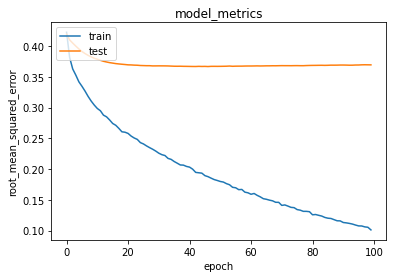

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Perhatikanlah, proses training model cukup smooth dan model konvergen pada epochs sekitar 100. Dari proses ini, kita memperoleh nilai error akhir pada data latih sebesar sekitar 0.13 dan error pada data validasi sebesar 0.38. Nilai tersebut cukup bagus untuk sistem rekomendasi.